## Exploratory Data Analysis #1


In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [37]:
all_customers = pd.read_csv("Telco_Customer_Churn.csv")
print (f"DataFrame Shape  {all_customers.shape}")
print (f"Null values Summary: \n{all_customers.isna().sum()}\n")
print (f"Column DataTypes \n{all_customers.dtypes}")
all_customers

DataFrame Shape  (7043, 21)
Null values Summary: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Column DataTypes 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
Paperles

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [38]:
columns = all_customers.columns.tolist()
all_customers['TotalCharges'] = pd.to_numeric(all_customers['TotalCharges'], errors='coerce')

## Class Disturbution

People who stayed : 5174 (73.46%)
People who left : 1869 (26.54%)


Text(0.5, 1.0, 'Churn Disturbution')

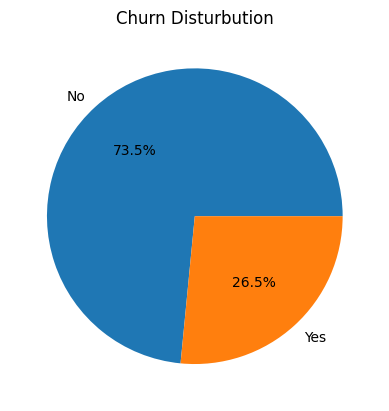

In [39]:
churn_count = all_customers["Churn"].value_counts()


print (f"People who stayed : {churn_count[0]} ({round((churn_count[0]/len(all_customers)*100), 2)}%)")
print (f"People who left : {churn_count[1]} ({round((churn_count[1]/len(all_customers)*100), 2)}%)")
plt.pie(x=churn_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Churn Disturbution")

## Helper Functions

In [40]:
#simple countplot for a given column 
def countplot(df, col_name):
    plot = sns.countplot(data = df, x = col_name, hue="Churn", saturation=0.65)
    plt.title(f"{col_name} Count")
    plt.show()

#splitting columns into numerical and categorical
def filter_columns(df):
    columns_str = []
    columns_num = []
    
    for col in columns:
        if is_numeric_dtype(df[col]):
            columns_num.append(col)
        else:
            columns_str.append(col)
    return columns_str, columns_num

def bar_plot(df,column, title):    
    ax = sns.countplot(y=column, data=df)
    plt.title(title)
    plt.xlabel('Count')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [41]:
categorical, numerical = filter_columns(all_customers)

In [42]:
for col in categorical:
    unique_values = all_customers[col].unique()
    print (f"{col} [{len(unique_values)}]")
    print (unique_values)
    print ("="*50)

customerID [7043]
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [2]
['Female' 'Male']
Partner [2]
['Yes' 'No']
Dependents [2]
['No' 'Yes']
PhoneService [2]
['No' 'Yes']
MultipleLines [3]
['No phone service' 'No' 'Yes']
InternetService [3]
['DSL' 'Fiber optic' 'No']
OnlineSecurity [3]
['No' 'Yes' 'No internet service']
OnlineBackup [3]
['Yes' 'No' 'No internet service']
DeviceProtection [3]
['No' 'Yes' 'No internet service']
TechSupport [3]
['No' 'Yes' 'No internet service']
StreamingTV [3]
['No' 'Yes' 'No internet service']
StreamingMovies [3]
['No' 'Yes' 'No internet service']
Contract [3]
['Month-to-month' 'One year' 'Two year']
PaperlessBilling [2]
['Yes' 'No']
PaymentMethod [4]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn [2]
['No' 'Yes']


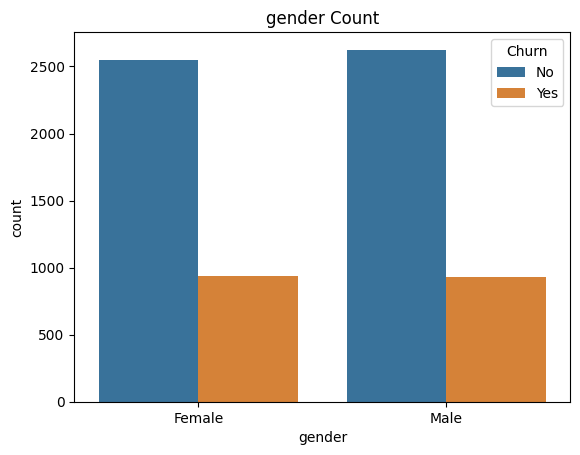

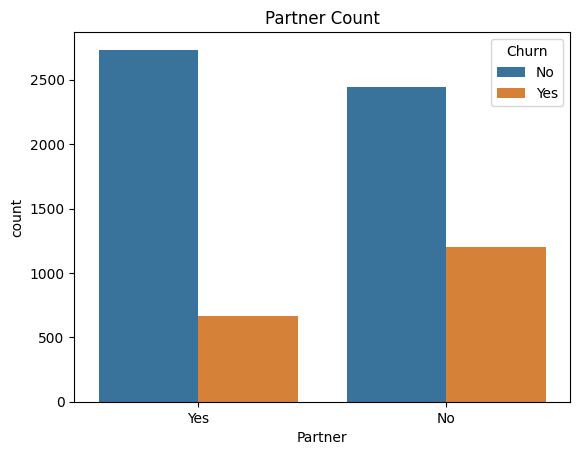

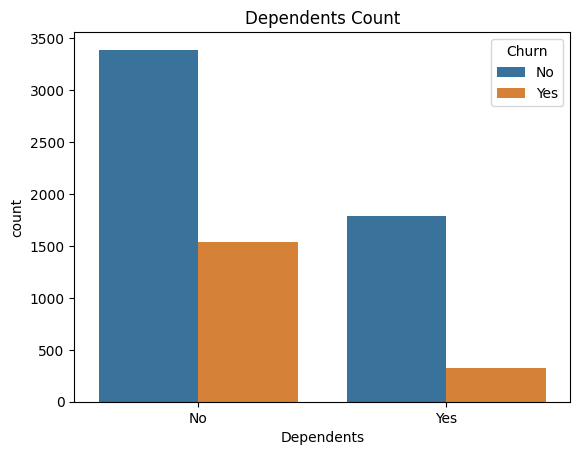

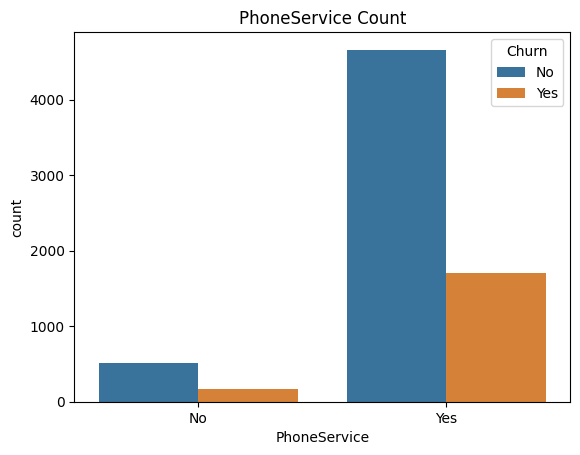

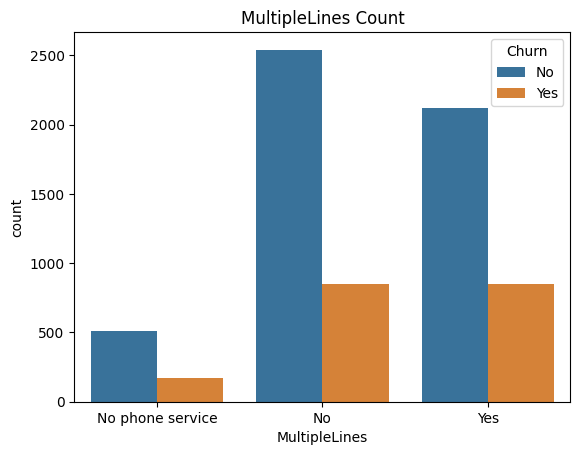

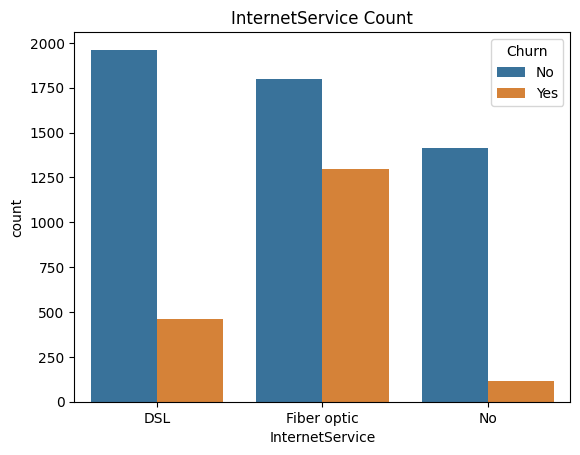

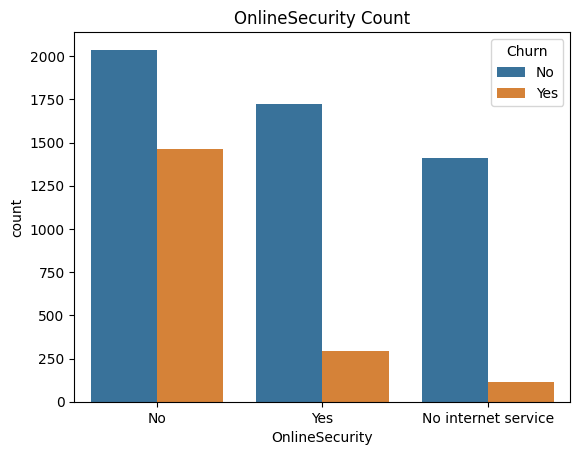

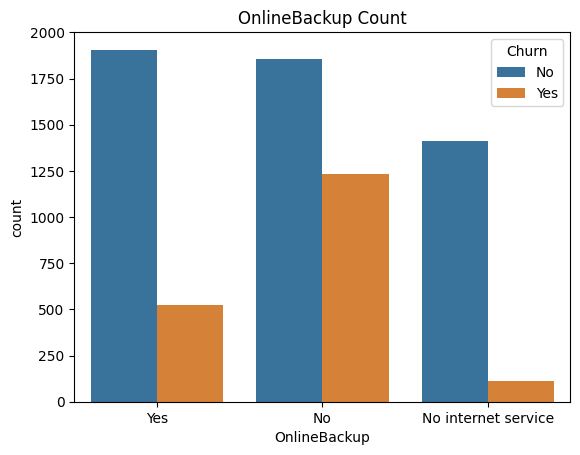

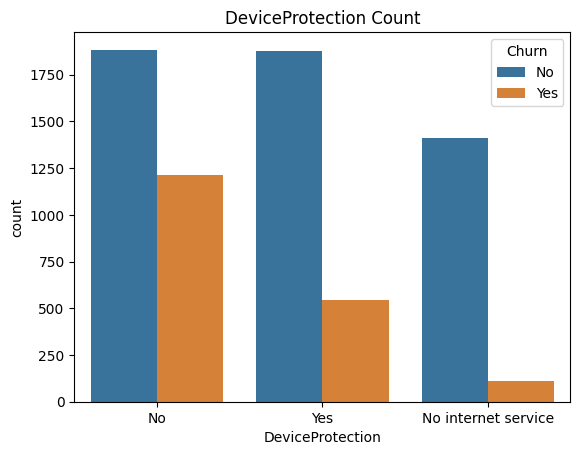

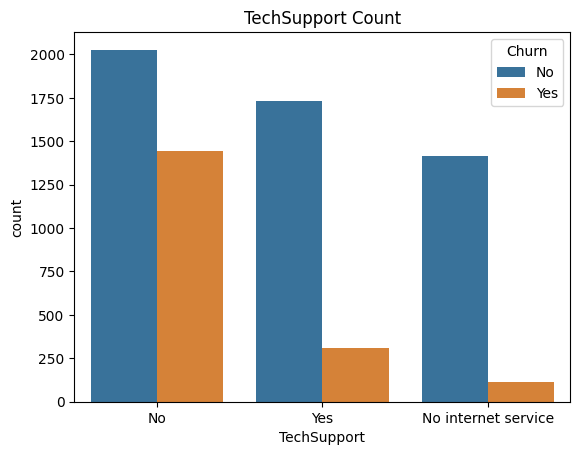

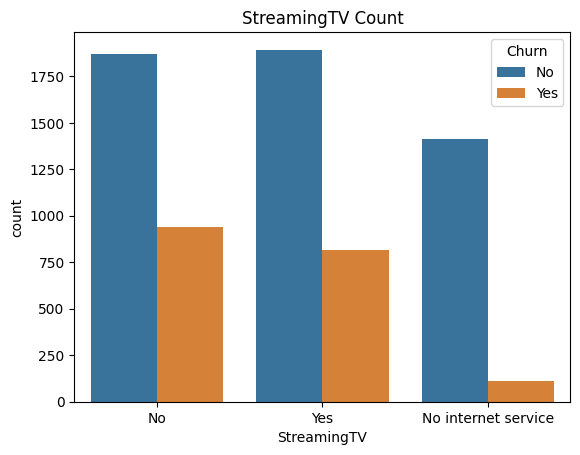

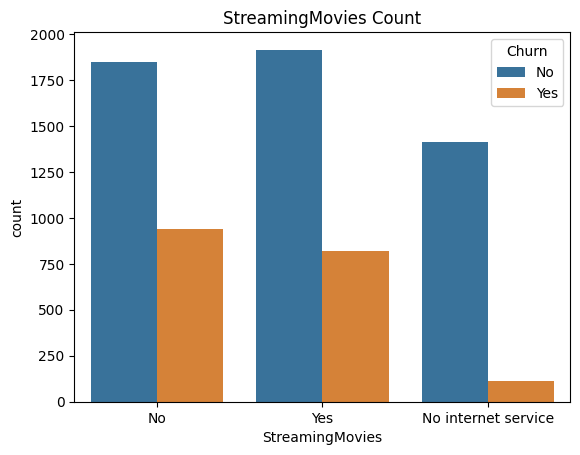

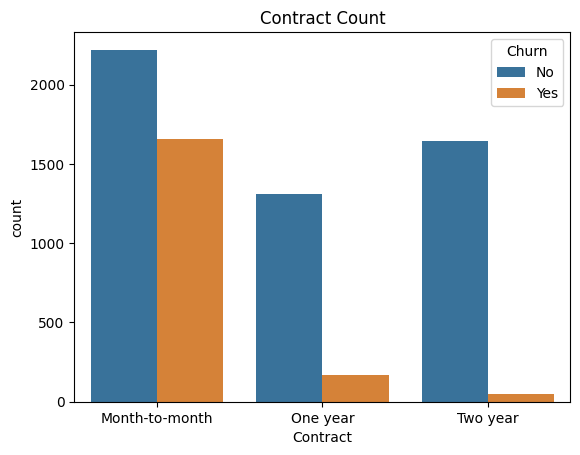

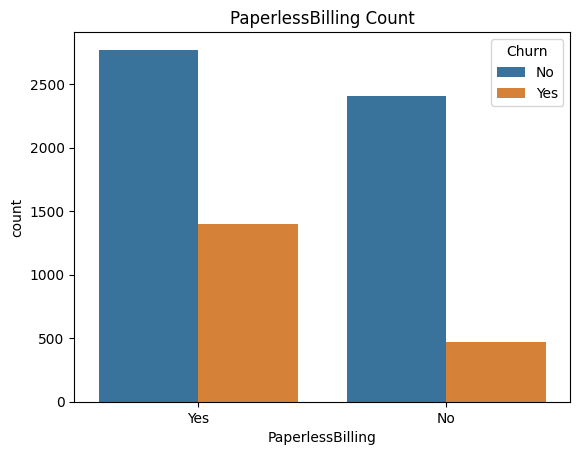

In [43]:
for col in categorical:
    if col == "customerID" or col == 'Churn' or col == 'PaymentMethod':
        continue
    else:
        countplot(all_customers,col)

### Contract Type

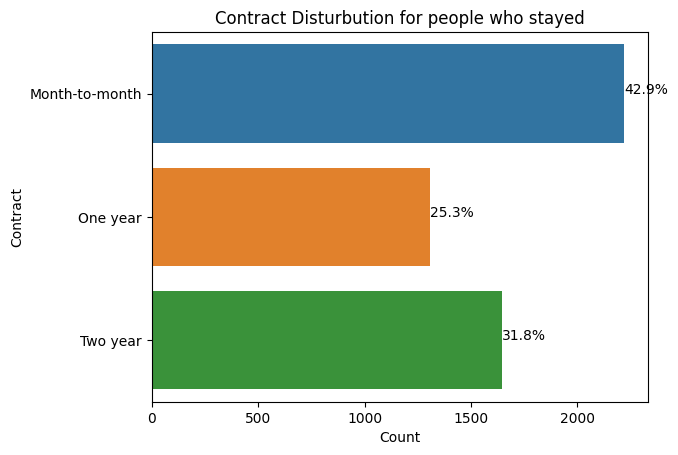

In [28]:
# People who stayed
filter = (all_customers["Churn"] == 'No')
bar_plot(all_customers[filter], 'Contract', "Contract Disturbution for people who stayed")


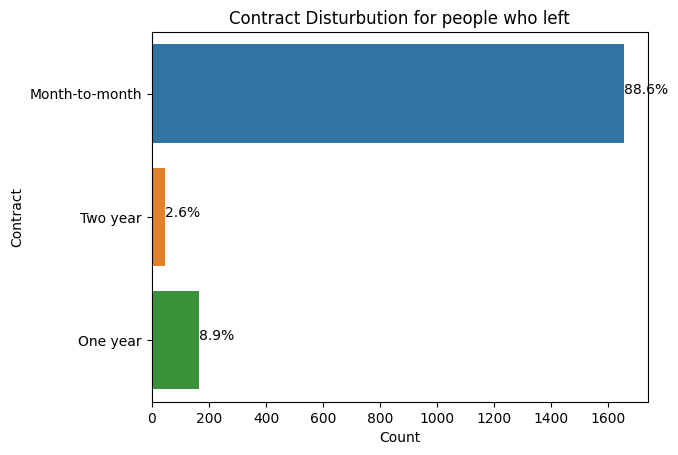

In [29]:
# People who left
filter = (all_customers["Churn"] == 'Yes')
bar_plot(all_customers[filter], 'Contract', "Contract Disturbution for people who left")

## PaymentMethod

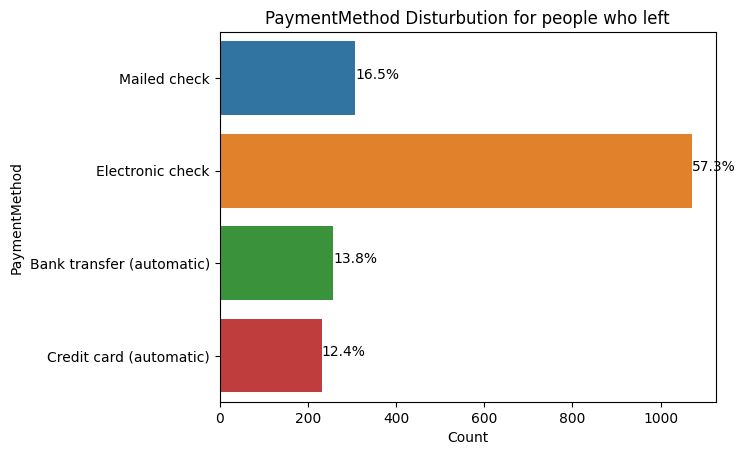

In [30]:
# people who left
filter = (all_customers["Churn"] == 'Yes')
bar_plot(all_customers[filter], 'PaymentMethod', "PaymentMethod Disturbution for people who left")

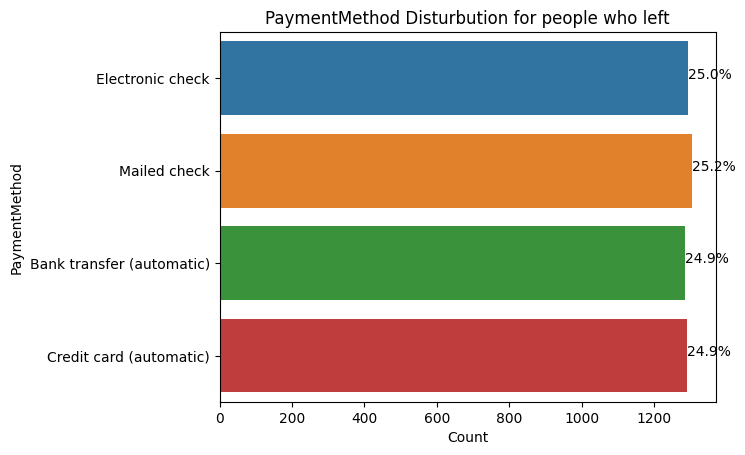

In [31]:
#people who stayed
filter = (all_customers["Churn"] == 'No')
bar_plot(all_customers[filter], 'PaymentMethod', "PaymentMethod Disturbution for people who stayed")

## Services Disturbution

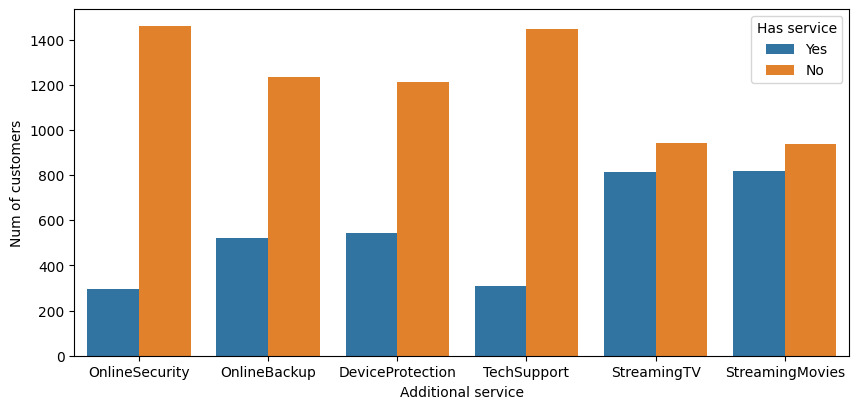

In [32]:
#People who Left
services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
filter = (all_customers["Churn"] == 'Yes')
temp = all_customers[filter]
df1 = pd.melt(temp[temp["InternetService"] != "No"][services]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

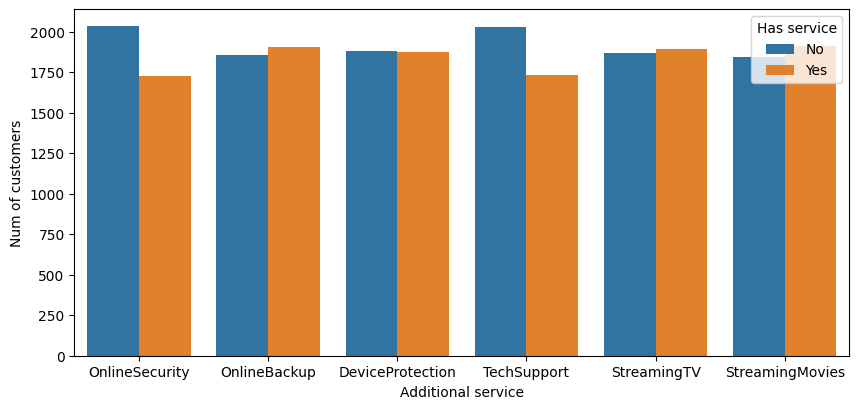

In [34]:
#People who stayed
filter = (all_customers["Churn"] == 'No')
temp = all_customers[filter]
df1 = pd.melt(temp[temp["InternetService"] != "No"][services]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

## Final Conclusions | Insights

#### People who Churned
[70%] had fiber  

[88%] had month-to-month contract 

[57%] used electronic payment as a payment method 

[6%] did not have internet

[25%] were above 60 years old
#### People who did not churn
[27%] dont have internet

[47%] had no spouse

[+50%] had one-year and two-year contracts
